# Практика №3

In [1]:
import iapws
from iapws import IAPWS97 as gas

In [2]:
MPa = 10 ** 6
kPa = 10 ** 3
unit = 1 / MPa
to_kelvin = lambda x: x + 273.15 if x else None

# Задача 2.1

Определить теоретическое значение скорости $С_{1t}$ и режим течения $М_{1t}$ водяного
пара в выходном сечении соплового канала при статическом давлении $Р_1$ = 3 МПа, если
статическое давление на входе $Р_0$ = 4,5 МПа, температура $t_0$ = 300 ˚C, а скорость пара на
входе $С_0$ = 40 м/с.

In [3]:
c_0 = 40
inlet_energy = 0.5 * c_0 ** 2
print(inlet_energy, "J / kg * K")

1600.5 J / kg * K


In [4]:
p_0 = 4.5 * MPa
t_0 = to_kelvin(300)
p_1 = 3 * MPa

In [5]:
inlet_point = gas(P=p_0 * unit, T=t_0)
full_inlet_energy = inlet_point.h + (inlet_energy / 1000)
full_inlet_energy

2945.7045648537382

In [6]:
inlet_full_point = gas(h = full_inlet_energy, s=inlet_point.s)
inlet_full_point.P, inlet_full_point.T, t_0

(4.531236198817996, 574.0618857891476, 573.15)

In [7]:
outlet_point = gas(P=p_1 * unit, s=inlet_full_point.s)

In [8]:
speed_theoretical = (2 * (inlet_full_point.h - outlet_point.h) * 1000) ** 0.5
speed_theoretical

427.24044797931754

In [9]:
sound_speed_theoretical = outlet_point.w
sound_speed_theoretical

520.7984845774441

In [10]:
mach_theoretical = speed_theoretical / sound_speed_theoretical
mach_theoretical

0.8203565498581741

In [11]:
print("Ответ на задачу 2.1: Скорость теоретическая:", round(speed_theoretical, 3), "m/s,",
      "Теоретическое число Маха: ", round(mach_theoretical, 3) )

Ответ на задачу 2.1: Скорость теоретическая: 427.24 m/s, теоретическая скорсоть звука:  0.82


## Задача 2.2

Оценить режим течения $М_{1t}$ и коэффициент расхода $μ_1$ для сопловой решетки, площадь выходного сечения которой $F_1$ = 22,65 $cм^2$. Массовый расход водяного пара с параметрами на входе в каналы решетки $Р̅_0$ = 0,12 МПа, $t_0$ = 210 ˚𝐶, G = 0,37 кг/с. Давление на выходе из решетки $Р_1$ = 73,4 кПа.

In [12]:
G = 0.37
p_0 = 0.12 * MPa
t_0 = to_kelvin(210)
mass_flow = 0.37
p_1 = 73.4 * kPa

outlet_area = 22.65 * 0.0001 # in m^2

In [13]:
inlet_point = gas(P=p_0 * unit, T=t_0)
outlet_point = gas(P=p_1 * unit, s=inlet_point.s)
sound_speed_theoretical = outlet_point.w

energy_drop = inlet_point.h - outlet_point.h
speed = (2 * energy_drop * 1000) ** 0.5
mach_theoretical = speed / sound_speed_theoretical
speed, mach_theoretical

(453.57846198552664, 0.8905184637388744)

$$G = \mu \cdot \rho \cdot c \cdot F$$

In [14]:
discharge_coefficient = G / (outlet_area * speed * outlet_point.rho)
discharge_coefficient

0.9677086024091285

In [15]:
print(
    "Ответ на задачу 2.2: Число маха: ", round(mach_theoretical, 3),
    "Коэффициент расхода:", round(discharge_coefficient, 3)
)

Ответ на задачу 2.2: Число маха:  0.891 Коэффициент расхода: 0.968


## Задача 2.3

Для одной из промежуточных ступеней паровой турбины К-300-23,5 построить графически треугольники скоростей (рис.1) при следующих исходных данных: $Р̅_0$ = $Р_0$ = 16,7 МПа; $t_0$ = $t_0$ = 520 ˚C; $Р_2$ = 14,5 МПа; $d_{ср}$ = 0,892 м; ρ = 0,08; $α_1$ = 13˚; $β_2$ = $β_1$ - 5˚; φ = 0,97; ψ = 0,935; n = 50 1/c (рис.2).

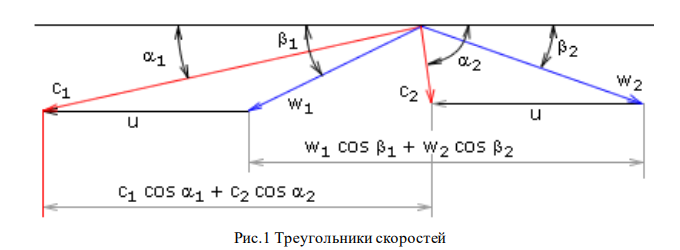

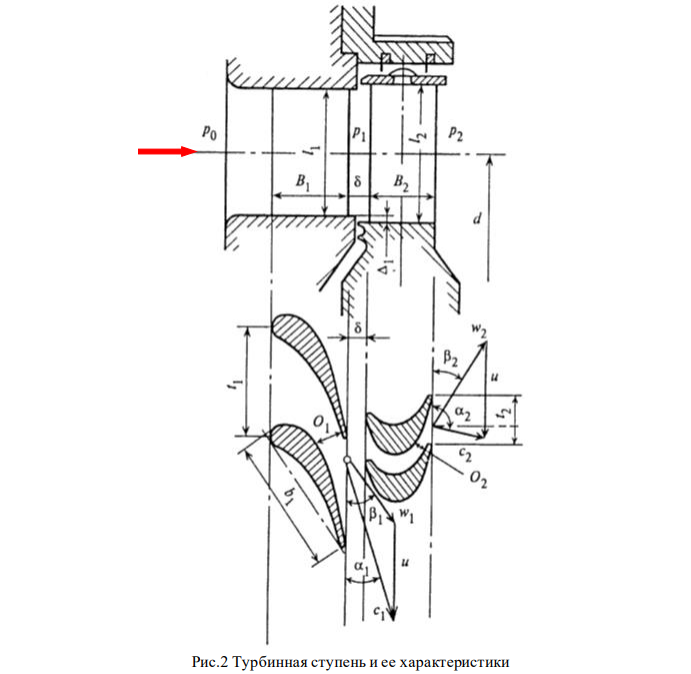

In [16]:
p_0 = 16.7 * MPa
t_0 = to_kelvin(520)
p_2 = 14.5 * MPa
avg_diameter = 0.893
degree_of_reaction = 0.08
alpha_1_deg = 13
delta_beta_deg = 5
fi = 0.97
psi = 0.935
rotation_speed = 50

In [17]:
inlet_point = gas(P=p_0 * unit, T=t_0)
outlet_point = gas(P=p_2 * unit, s=inlet_point.s)

theoretical_heat_drop = inlet_point.h - outlet_point.h
stator_heat_drop = theoretical_heat_drop * (1 - degree_of_reaction) 
rotor_heat_drop = theoretical_heat_drop * degree_of_reaction

In [18]:
c_1t = (2 * 1000 * stator_heat_drop) ** 0.5
c_1 = c_1t * fi
c_1t, c_1

(286.36204816678355, 277.77118672178005)

In [19]:
import math
u = math.pi * avg_diameter * rotation_speed
u

140.27211198278425

In [20]:
sin_alpha_1 = math.sin(math.radians(alpha_1_deg))
cos_alpha_1 = math.cos(math.radians(alpha_1_deg))

w_1 = (c_1 ** 2 + u ** 2 - 2 * c_1 * u * cos_alpha_1) ** 0.5
w_1

144.57960482134962

In [21]:
w_2t = (w_1 ** 2 + 2 * rotor_heat_drop * 1000) ** 0.5
w_2 = w_2t * psi

w_2t, w_2

(167.43350065511353, 156.55032311253117)

In [22]:
beta_1 = math.atan(sin_alpha_1 / (cos_alpha_1 - u / c_1))
beta_1_deg = math.degrees(beta_1)
beta_2_deg = beta_1_deg - delta_beta_deg
beta_1_deg, beta_2_deg

(25.606211288486275, 20.606211288486275)

In [23]:
sin_beta_2 = math.sin(math.radians(beta_2_deg))
cos_beta_2 = math.cos(math.radians(beta_2_deg))

c_2 = (w_2 ** 2 + u ** 2 - 2 * w_2 * u * cos_beta_2) ** 0.5
c_2

55.45155816154107

In [24]:
alpha_2 = math.atan(sin_beta_2 / (cos_beta_2 - u / w_2))
alpha_2_deg = math.degrees(alpha_2)
alpha_2_deg

83.51555298853883

In [25]:
c1_plot = [[0, -c_1 * cos_alpha_1], [0, -c_1 * sin_alpha_1]]
u1_plot = [[-c_1 * cos_alpha_1, -c_1 * cos_alpha_1 + u], [-c_1 * sin_alpha_1, -c_1 * sin_alpha_1]]
w1_plot = [[0, -c_1 * cos_alpha_1 + u], [0, -c_1 * sin_alpha_1]]

w2_plot = [[0, w_2 * cos_beta_2], [0, -w_2 * sin_beta_2]]
u2_plot = [[w_2 * cos_beta_2, w_2 * cos_beta_2 - u], [-w_2 * sin_beta_2, -w_2 * sin_beta_2]]
c2_plot = [[0, w_2 * cos_beta_2 - u], [0, -w_2 * sin_beta_2]]

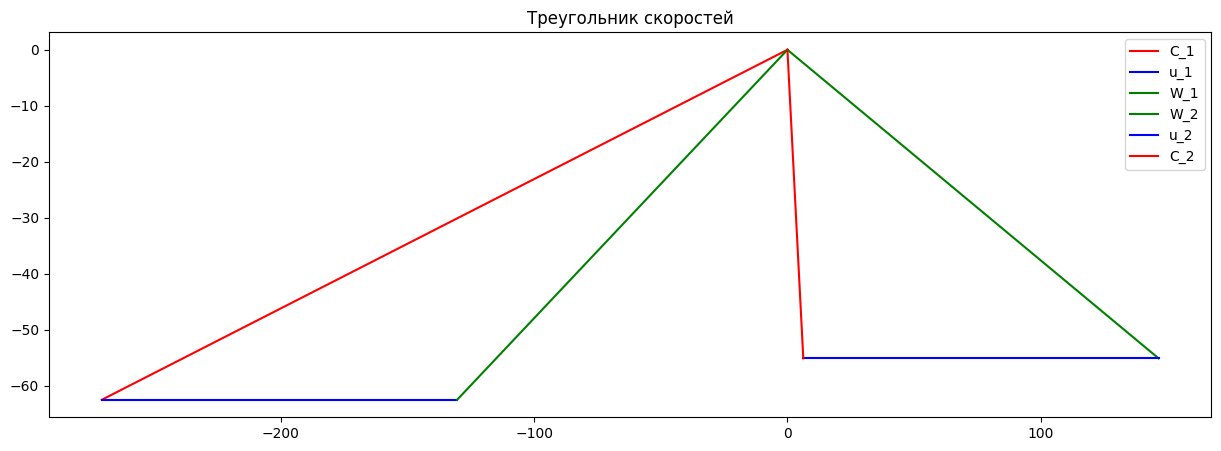

In [26]:
import matplotlib.pyplot as plt
fig, ax  = plt.subplots(1, 1, figsize=(15, 5))

ax.plot(c1_plot[0], c1_plot[1], label='C_1', c='red')
ax.plot(u1_plot[0], u1_plot[1], label='u_1', c='blue')
ax.plot(w1_plot[0], w1_plot[1], label='W_1', c='green')

ax.plot(w2_plot[0], w2_plot[1], label='W_2', c='green')
ax.plot(u2_plot[0], u2_plot[1], label='u_2', c='blue')
ax.plot(c2_plot[0], c2_plot[1], label='C_2', c='red')

ax.set_title("Треугольник скоростей")
ax.legend();

In [27]:
absolute_projection = c_1 * cos_alpha_1 + c_2 * math.cos(alpha_2)
relative_projection = w_1 * math.cos(beta_1) + w_2 * cos_beta_2

assert round(absolute_projection, 5) == round(relative_projection, 5)
absolute_projection, relative_projection

(276.9142679485645, 276.91426794856454)

## Задача 2.4

Для условий примера задачи `2.3` оценить относительный лопаточный КПД $η_{ол}$
турбинной ступени и ее мощность Nол для степеней использования энергии выходной
скорости ϰвс = 0 и ϰвс = 1. Массовый расход водяного пара G = 240 кг/с.

In [194]:
mass_flow = 240

In [195]:
outlet_speed_loss = 0.5 * c_2 ** 2

In [196]:
stator_speed_loss = 0.5 * ((c_1t ** 2) - (c_1 ** 2))
rotor_speed_loss = 0.5 * ((w_2t ** 2) - (w_2 ** 2))

In [202]:
def get_available_energy(kappa) -> float:
    return theoretical_heat_drop * 1000 - kappa * outlet_speed_loss


def turbine_efficiency(kappa: float) -> float:
    constant_part = get_available_energy(kappa) - stator_speed_loss - rotor_speed_loss
    useful_energy = constant_part - (1 - kappa) * outlet_speed_loss
    return useful_energy / get_available_energy(kappa)

In [209]:
print("Внутренний КПД при использовании: ", turbine_efficiency(1))
print("Внутренний КПД при частичном использовании: ", turbine_efficiency(0.5))
print("Внутренний КПД при не использовании: ", turbine_efficiency(0))

Внутренний КПД при использовании:  0.9026531974633246
Внутренний КПД при частичном использовании:  0.8868074034963481
Внутренний КПД при не использовании:  0.8715083476070102


In [208]:
power_of_using = mass_flow * get_available_energy(1) * turbine_efficiency(1)
power_of_not_using = mass_flow * get_available_energy(0) * turbine_efficiency(0)
power_of_half_using = mass_flow * get_available_energy(0.5) * turbine_efficiency(0.5)
print("Мощность на лопатках при полной использовании, Вт: ", power_of_using)
print("Мощность на лопатках при частичной использовании, Вт: ", power_of_half_using)
print("Мощность на лопатках при не использовании, Вт: ", power_of_not_using)

Мощность на лопатках при полной использовании, Вт:  9321716.485168824
Мощность на лопатках при частичной использовании, Вт:  9321716.485168826
Мощность на лопатках при не использовании, Вт:  9321716.485168824


## Задача 2.5

Оценить располагаемые теплоперепады турбинной ступени со средним диаметром
d = 1,05 м из условия $η_{ол}$ = $η_{ол}^{max}$ при $α_1$ =16˚, коэффициенте скорости сопловой решетки φ
= 0,97 и следующих значениях степени реактивности: ρ 1 = 0; ρ2 = 0,2; ρ3 = 0,5. Принять частоту вращения ротора паровой турбины n = 50 1/c и n = 60 1/c
.

$$\frac{u}{C_ф} = \frac{\phi \cdot sin(\alpha_1)}{2 \cdot \sqrt{1-\rho}}$$

In [217]:
avg_diameter = 1.05
sin_alpha_1 = math.sin(math.radians(16))
fi = 0.97

def get_u(n: float) -> float:
    return math.pi * avg_diam * n

def get_heat_drop(speed: float) -> float:
    return 0.5 * speed ** 2

def solve_exercise(n, rho) -> float:
    right = fi * sin_alpha_1 / (2 * (1 - rho) ** 0.5)
    dummy_speed = get_u(n) / right
    heat_drop = get_heat_drop(dummy_speed)
    return heat_drop

def print_solution(n: float, rho: float) -> None:
    heat_drop = solve_exercise(n=n, rho=rho)
    print("Ответ на задача 2.5")
    print("При n = ", n, ", степени реактивности: ", rho,
          ", теплоперепад составил", round(heat_drop / 1000, 3), "kJ / kg * K")

In [218]:
print_solution(50, 0)

Ответ на задача 2.5
При n =  50 , степени реактивности:  0 , теплоперепад составил 761.077 kJ / kg * K


In [220]:
print_solution(50, 0.2)

Ответ на задача 2.5
При n =  50 , степени реактивности:  0.2 , теплоперепад составил 608.862 kJ / kg * K


In [221]:
print_solution(50, 0.5)

Ответ на задача 2.5
При n =  50 , степени реактивности:  0.5 , теплоперепад составил 380.539 kJ / kg * K


In [222]:
print_solution(60, 0)

Ответ на задача 2.5
При n =  60 , степени реактивности:  0 , теплоперепад составил 1095.951 kJ / kg * K


In [223]:
print_solution(60, 0.2)

Ответ на задача 2.5
При n =  60 , степени реактивности:  0.2 , теплоперепад составил 876.761 kJ / kg * K


In [224]:
print_solution(60, 0.5)

Ответ на задача 2.5
При n =  60 , степени реактивности:  0.5 , теплоперепад составил 547.976 kJ / kg * K
